## main

할거

- [x] segmentation load, write 빼기
- [x] pixelate argument 통일
- [x] 공통 함수?? - all -> fit 
- [x] ssh 권한 

이번주 
- [ ] cp-vton 돌아가게하기
- [ ] preprocess 정책 생각하기

다음주
- [ ] segmentation 개선 - pixelate의 outline 안 밖을 0,255로 하면 되는 거 아닐까?

함께 to do
- [ ] 공통 함수?? - plot??-- 형식 맞춰서 작성 필요
- [ ] git-clone - https://ndb796.tistory.com/562

나중에
- [ ] requirements 


있어야할 것들
- method들
- plot
- all
- 

### [temp] cpvton test.py - image size
- cloth-raw x
- cloth 도? <- pixelate 결과 
- cloth-mask 도? <- segmentation 결과

- 어쨋든 캐릭터의 크기는 동일하니까 옷 사이즈를 맞춰주는 것이 필요함
- 이후에 옷부분만 사진에 맞게 resize하는 preprocessing은 필요할듯 - 사진에서 옷이 차지하는 크기가 유저가 어떻게 찍느냐에 따라 각각 상이할 것이라서 -> 이걸 전처리해주는데, 특정 임계를 초과하면 alert떠서 '옷을 더 크게 찍어서 업로드 해주세요.' 이런 문구로 보완하는 것도 하나의 방법일듯
- 일단 자르기 말고 확대/축소하는 것으로

- `cloth` : 256 192 3
- `cloth-mask` : 256 192 3

256 192 3


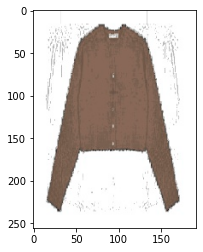

In [3]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("./data/test/cloth/000000_1.jpg")
plt.imshow(img)
h,w,c = img.shape
print(h,w,c)

256 192 3


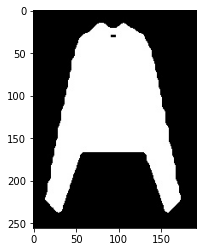

In [4]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("./data/test/cloth-mask/000000_1.jpg")
plt.imshow(img)
h,w,c = img.shape
print(h,w,c)

256 192 3


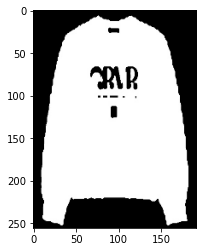

In [10]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("./data/test/cp-vton/cloth/014159_1.jpg")
img = cv2.imread("./data/test/cloth-mask/000001_1.jpg")
plt.imshow(img)
img = cv2.resize(img, dsize=(192,256), interpolation=cv2.INTER_LINEAR)
plt.imshow(img)
h,w,c = img.shape
print(h,w,c)

### [temp] cpvton test.py
- test_pairs.txt
    - image : _0.jpg    ex) 000001_0.jpg
    - cloth : _1.jpg    ex) 004325_1.jpg
- filename_end rule
    - ` _0.jpg ` : **image, image-parse, pose**  
    - ` _1.jpg ` : **cloth, cloth-mask, warp-cloth, warp-mask**
    

### [temp] cpvton test.py - main

In [1]:
! python test.py --name gmm --stage GMM --workers 1 --datamode test --data_list test_pairs.txt --checkpoint checkpoints/gmm_final.pth

Namespace(batch_size=4, checkpoint='checkpoints/gmm_final.pth', data_list='test_pairs.txt', datamode='test', dataroot='data', display_count=1, fine_height=256, fine_width=192, gpu_ids='', grid_size=5, name='gmm', radius=5, result_dir='result', shuffle=False, stage='GMM', tensorboard_dir='tensorboard', workers=1)
Start to test stage: GMM, named: gmm!
initialization method [normal]
initialization method [normal]


Traceback (most recent call last):
  File "test.py", line 162, in <module>
    main()
  File "test.py", line 147, in main
    model = GMM(opt)
  File "C:\Users\user\Documents\GitHub\PJ_01\step\model.py", line 298, in __init__
    self.regression = FeatureRegression(input_nc=192, output_dim=2*opt.grid_size**2, use_cuda=True)
  File "C:\Users\user\Documents\GitHub\PJ_01\step\model.py", line 124, in __init__
    self.conv.cuda()
  File "C:\Users\user\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 688, in cuda
    return self._apply(lambda t: t.cuda(device))
  File "C:\Users\user\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 578, in _apply
    module._apply(fn)
  File "C:\Users\user\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 601, in _apply
    param_applied = fn(param)
  File "C:\Users\user\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 688, in <lambda>
    return self._apply(lambda t: t.cuda(device))
  File "C:\Users\user\an

In [ ]:
! python test.py --name tom --stage TOM --workers 4 --datamode test --data_list test_pairs.txt --checkpoint checkpoints/tom_final.pth

In [1]:
# !pip install tensorboardX
# !pip install opencv-python
# !pip install git+https://github.com/sedthh/pyxelate.git
# from skimage import io


# [main] RUN

In [ ]:
%run model.py


** PIPELINE 1 (mode = live) ___________________________________________________________________________________________
